### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from tqdm import tqdm
import random


cwd = os.getcwd()

### Open Dataset and Data review

In [13]:
data_dir = os.path.join(cwd, 'data/')
data = pd.read_csv(os.path.join(data_dir, 'log2.csv'))
data.head(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
5,51465,443,39975,443,allow,3961,1595,2366,21,16,12,9
6,60513,47094,45469,47094,allow,320,140,180,6,7,3,3
7,50049,443,21285,443,allow,7912,3269,4643,23,96,12,11
8,52244,58774,2211,58774,allow,70,70,0,1,5,1,0
9,50627,443,16215,443,allow,8256,1674,6582,31,75,15,16


In [14]:
data.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Action                  object
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
dtype: object

In [15]:
data.isna().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

### Data preprocessing and Data cleaning

In [19]:
# declare utility functions
def normalized(dataset, colmun):
    dataset[colmun] = MinMaxScaler(feature_range=(0, 1)).fit_transform(dataset[colmun].values.reshape(-1,1))
    return dataset

def onehot_encode(dataset, column):
    onehot = pd.get_dummies(dataset[column], prefix="{}_".format(column), prefix_sep="")
    dataset = pd.concat([dataset, onehot], axis=1)
    dataset = dataset.drop(column, axis=1)
    return dataset

def label_encode(dataset, column):
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    return dataset

def show_corr(dataset):
    plt.figure(figsize=(25,20))
    corr = dataset.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
    plt.show()

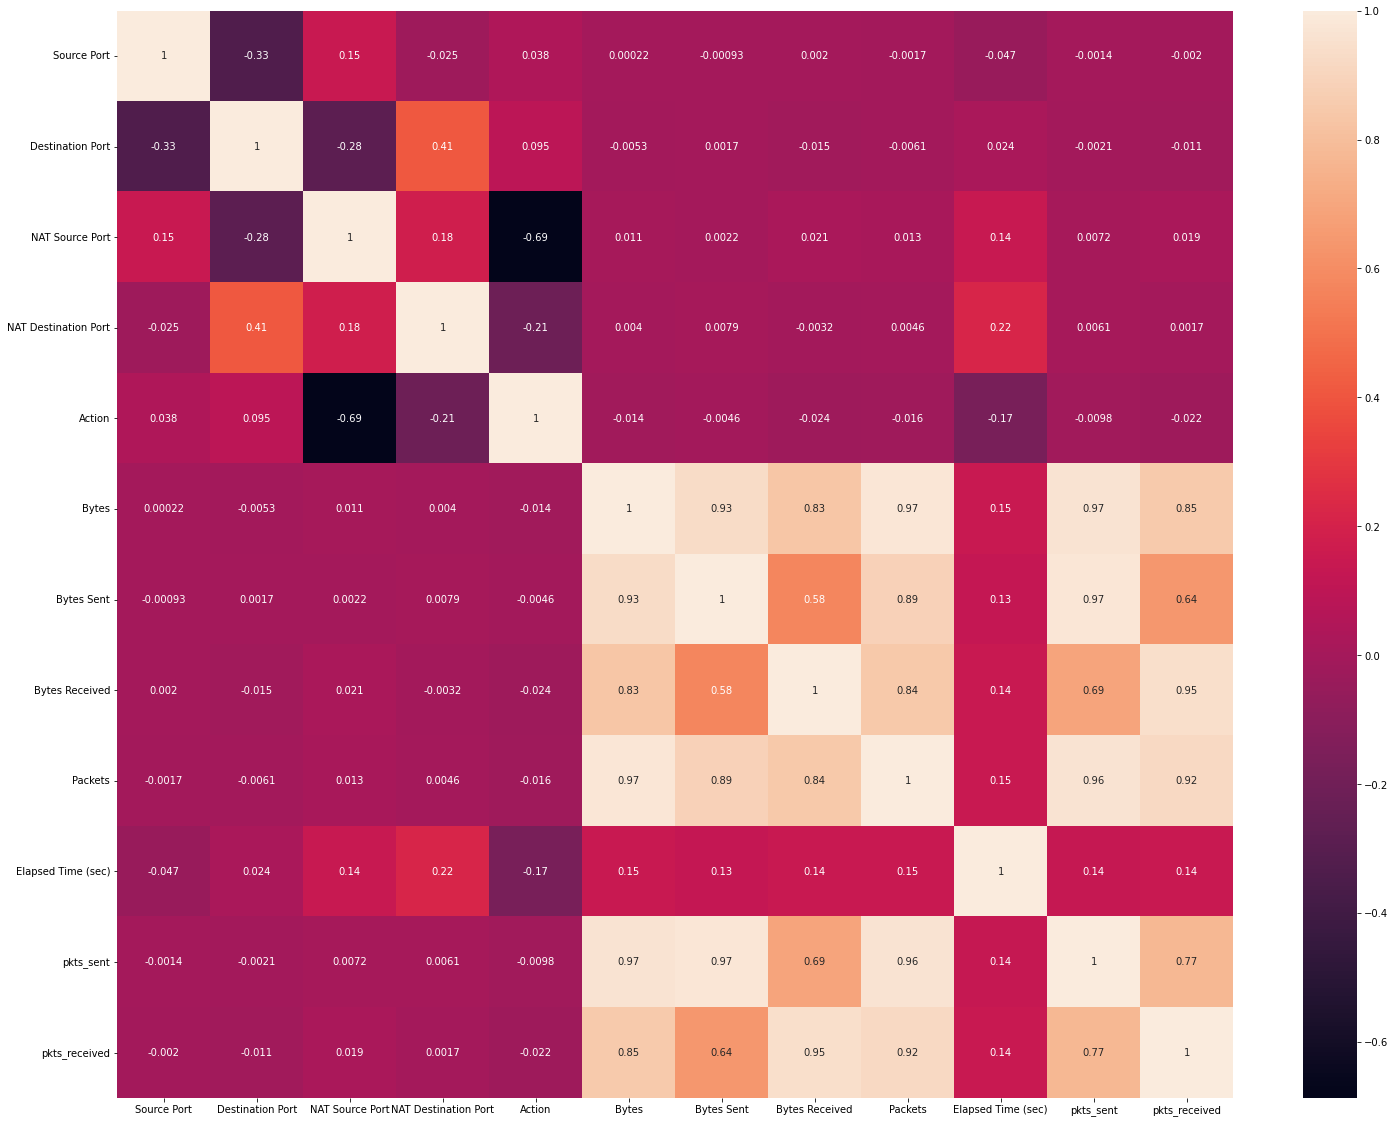

In [20]:
# numeric column processing
for i in ["Source Port", "Destination Port", "NAT Source Port", "NAT Destination Port", "Bytes", "Bytes Sent", "Bytes Received", "Packets", "Elapsed Time (sec)", "pkts_sent", "pkts_received"]:
    data = normalized(data, i)

# binary field processing
for i in ["Action"]:
    data = label_encode(data, i)

show_corr(data)

In [21]:
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.873165,0.000809,0.832944,0.000809,0,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003
1,0.858455,0.051713,0.858442,0.051713,0,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028
2,0.104999,0.767849,0.660182,0.767849,0,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003
3,0.771401,0.051713,0.771389,0.051713,0,2.573740e-06,1.452855e-06,5.886903e-06,1.351201e-05,0.001571,0.000009,0.000021
4,0.762993,0.006760,0.699596,0.006760,0,1.992974e-05,7.082933e-06,5.790294e-05,2.895431e-05,0.001478,0.000016,0.000055


In [22]:
data.dtypes

Source Port             float64
Destination Port        float64
NAT Source Port         float64
NAT Destination Port    float64
Action                    int64
Bytes                   float64
Bytes Sent              float64
Bytes Received          float64
Packets                 float64
Elapsed Time (sec)      float64
pkts_sent               float64
pkts_received           float64
dtype: object

### Split train/test set

In [23]:
target, feature = data['Action'], data.drop(columns=['Action'], axis=1)
print(f"normalized data shape: {data.shape}")
print(f"feature(x-axis) shape: {feature.shape}")
print(f"target(y-axis) shape: {target.shape}")

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=random.randint(0,100))

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

normalized data shape: (65532, 12)
feature(x-axis) shape: (65532, 11)
target(y-axis) shape: (65532,)
x_train shape: (52425, 11)
x_test shape: (13107, 11)
y_train shape: (52425,)
y_test shape: (13107,)


### Baseline classfication accuracy

In [25]:
# 此處使用 DummyClassifier 做為基準模型
# 將策略指定為 'most_frequent'
# 在這個策略下，模型總是回傳最頻繁出現的y-axis值
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(x_train, y_train)
baseAcc = dummy.score(x_test, y_test)
print(f"baseline Acc: {baseAcc}")

baseline Acc: 0.5773250934615091


### Model Traning!!

In [27]:
estimator_range = range(1, 20)

### Method 1: Bagging Classifier

100%|██████████| 19/19 [00:10<00:00,  1.85it/s]

[bagging] max score 0.9982452124818799 at 7


Text(0, 0.5, 'Accuracy')

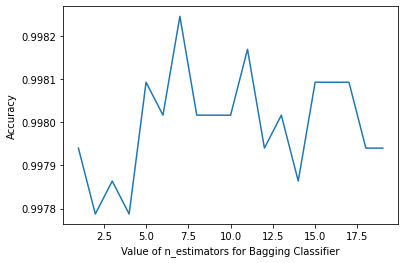

In [28]:
max_score_bag, max_k_bag = -1, -1

score_bag = []
for k in tqdm(estimator_range):
    bag = BaggingClassifier(n_estimators=k)
    bag.fit(x_train, y_train)
    score_bag.append(bag.score(x_test, y_test))
    if score_bag[-1] > max_score_bag:
        max_score_bag, max_k_bag = score_bag[-1], k

print(f"[bagging] max score {max_score_bag} at {max_k_bag}")

plt.plot(estimator_range, score_bag)
plt.xlabel('Value of n_estimators for Bagging Classifier')
plt.ylabel('Accuracy')

In [29]:
# using DecisionTreeClassifier as weak estimator
base_est1 = DecisionTreeClassifier()
bagging = BaggingClassifier(base_estimator=base_est1, n_estimators=max_k_bag, random_state=42)
bagging.fit(x_train, y_train)
bag_predict = bagging.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, bag_predict)}")

Accuracy: 0.998092622262913


### Method 2: Random Forest Model

100%|██████████| 19/19 [00:05<00:00,  3.43it/s]

[Random Forest] max score 0.9983215075913634 at 13


Text(0, 0.5, 'Accuracy')

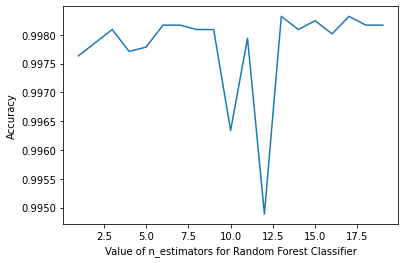

In [30]:
max_score_rfc, max_k_rfc = -1, -1

score_rfc = []
for k in tqdm(estimator_range):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    score_rfc.append(rfc.score(x_test, y_test))
    if score_rfc[-1] > max_score_rfc:
        max_score_rfc, max_k_rfc = score_rfc[-1], k

print(f"[Random Forest] max score {max_score_rfc} at {max_k_rfc}")

plt.plot(estimator_range, score_rfc)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Accuracy')

In [31]:
rfc = RandomForestClassifier(n_estimators=max_k_rfc, random_state=42)
rfc.fit(x_train, y_train)
rfc_predict = rfc.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, rfc_predict)}")

Accuracy: 0.9981689173723964


In [32]:
# find feature importance in RandomForestClassifier
feature_importance = pd.DataFrame(rfc.feature_importances_, index=feature.columns, columns=['importance'])
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.head(10)

,importance
Destination Port,0.298325
Elapsed Time (sec),0.156385
NAT Source Port,0.146531
Packets,0.127797
NAT Destination Port,0.113385
pkts_received,0.079811
Bytes Received,0.041359
Source Port,0.034536
pkts_sent,0.001388
Bytes Sent,0.000349


### Method 3: Ada Boost Model

100%|██████████| 19/19 [00:08<00:00,  2.21it/s]

[Ada Boost] max score 0.9983978027008469 at 11


Text(0, 0.5, 'Accuracy')

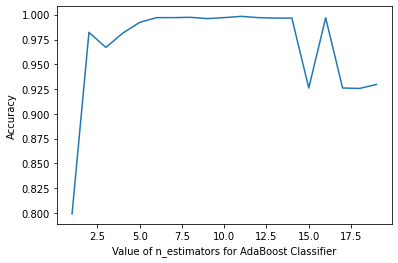

In [33]:
max_score_ada, max_k_ada = -1, -1

score_ada = []
for k in tqdm(estimator_range):
    ada = AdaBoostClassifier(n_estimators=k)
    ada.fit(x_train, y_train)
    score_ada.append(ada.score(x_test, y_test))
    if score_ada[-1] > max_score_ada:
        max_score_ada, max_k_ada = score_ada[-1], k

print(f"[Ada Boost] max score {max_score_ada} at {max_k_ada}")

plt.plot(estimator_range, score_ada)
plt.xlabel('Value of n_estimators for AdaBoost Classifier')
plt.ylabel('Accuracy')

In [34]:
# using DecisionTreeClassifier as weak estimator
base_est2 = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=base_est2, n_estimators=max_k_ada, random_state=42)
ada.fit(x_train, y_train)
ada_predict = ada.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, ada_predict)}")

Accuracy: 0.9977111467154955


### Make Classifier Together!

In [35]:
voting = VotingClassifier(estimators=[('bag', bagging), ('rfc', rfc), ('ada', ada)], voting='hard')
voting.fit(x_train, y_train)
voting_predict = voting.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, voting_predict)}")

Accuracy: 0.998092622262913
